In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
dataset=pd.read_csv('Default.csv')
dataset.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [3]:
data=dataset.copy()

In [4]:
data['default']=data.default.replace('No',0)
data['default']=data.default.replace('Yes',1)
#data['student']=data.student.replace('No',0)
#data['student']=data.student.replace('Yes',1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  int64  
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 312.6+ KB


In [6]:
data.describe()

,default,balance,income
count,10000.000000,10000.000000,10000.000000
mean,0.033300,835.374886,33516.981876
std,0.179428,483.714985,13336.639563
min,0.000000,0.000000,771.967729
25%,0.000000,481.731105,21340.462903
50%,0.000000,823.636973,34552.644802
75%,0.000000,1166.308386,43807.729272
max,1.000000,2654.322576,73554.233495


array([[<AxesSubplot:title={'center':'default'}>,
        <AxesSubplot:title={'center':'balance'}>],
       [<AxesSubplot:title={'center':'income'}>, <AxesSubplot:>]],
      dtype=object)

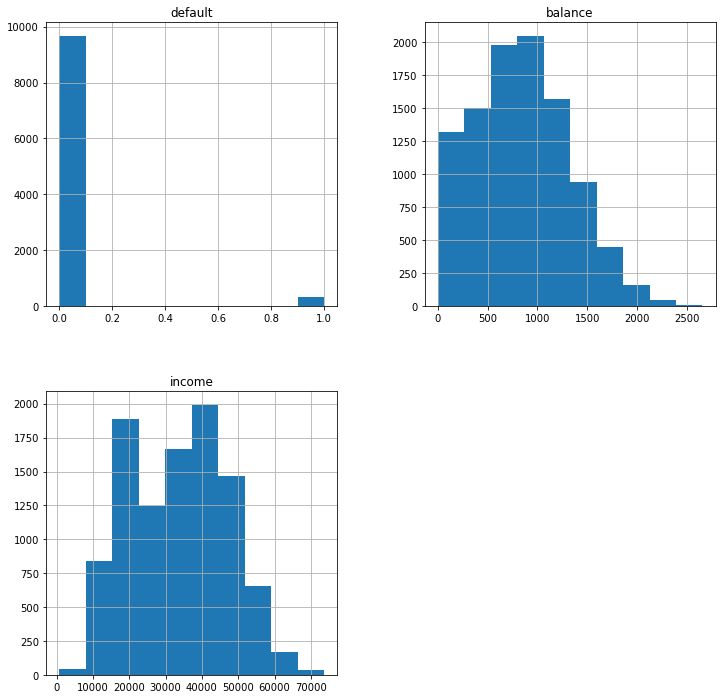

In [7]:
data.hist(figsize=(12,12))

<AxesSubplot:xlabel='student', ylabel='count'>

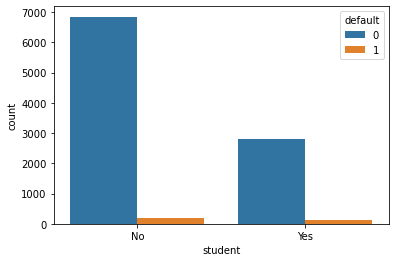

In [8]:
sns.countplot('student',hue='default',data=data)

In [9]:
data['default'].value_counts()

0    9667
1     333
Name: default, dtype: int64

In [10]:
data['balance']=np.round(data['balance'])
data['income']=np.round(data['income'])

In [11]:
data.head()

,default,student,balance,income
0,0,No,730.0,44362.0
1,0,Yes,817.0,12106.0
2,0,No,1074.0,31767.0
3,0,No,529.0,35704.0
4,0,No,786.0,38463.0


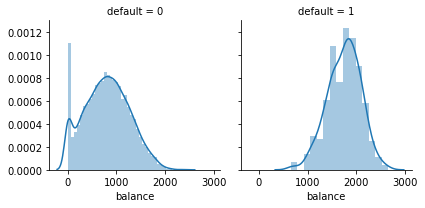

In [12]:
#plt.subplots(2)
s=sns.FacetGrid(data=data,col='default')
s=s.map(sns.distplot,'balance')

In [13]:
'''
data['balance_less_than_900']=0
e=data[data['balance']<900].index.tolist()
data.loc[e,'balance_less_than_900']=1
data['balance_greater_than_2400']=0
f=data[data['balance']>2400].index.tolist()
data.loc[e,'balance_greater_than_2400']=1
'''

"\ndata['balance_less_than_900']=0\ne=data[data['balance']<900].index.tolist()\ndata.loc[e,'balance_less_than_900']=1\ndata['balance_greater_than_2400']=0\nf=data[data['balance']>2400].index.tolist()\ndata.loc[e,'balance_greater_than_2400']=1\n"

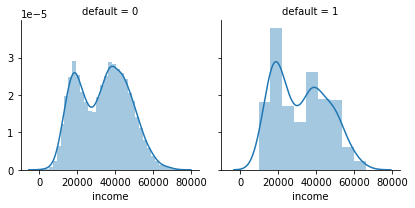

In [14]:
t=sns.FacetGrid(data=data,col='default')
t=t.map(sns.distplot,'income')

In [15]:
'''
data['income_less_than_10000']=0
g=data[data['income']<10000].index.tolist()
data.loc[g,'income_less_than_10000']=1
data['income_greater_than_65000']=0
h=data[data['income']<10000].index.tolist()
data.loc[h,'income_greater_than_65000']=1
'''

"\ndata['income_less_than_10000']=0\ng=data[data['income']<10000].index.tolist()\ndata.loc[g,'income_less_than_10000']=1\ndata['income_greater_than_65000']=0\nh=data[data['income']<10000].index.tolist()\ndata.loc[h,'income_greater_than_65000']=1\n"

In [16]:
#data['bal_quan']=pd.qcut(data['balance'],q=4)
#data['inc_quan']=pd.qcut(data['income'],q=4)

In [17]:
#data=pd.get_dummies(data,columns=['student','balance_less_than_900','balance_greater_than_2400','income_less_than_10000','income_greater_than_65000'])
#data['new-inc']= data['inc'] - data[['']] 

In [18]:
#data['new-inc']= data['income']-data[['student','income']].groupby('student').transform('median')
#data['new-bal']= data['balance']-data[['student','balance']].groupby('student').transform('median')

<AxesSubplot:>

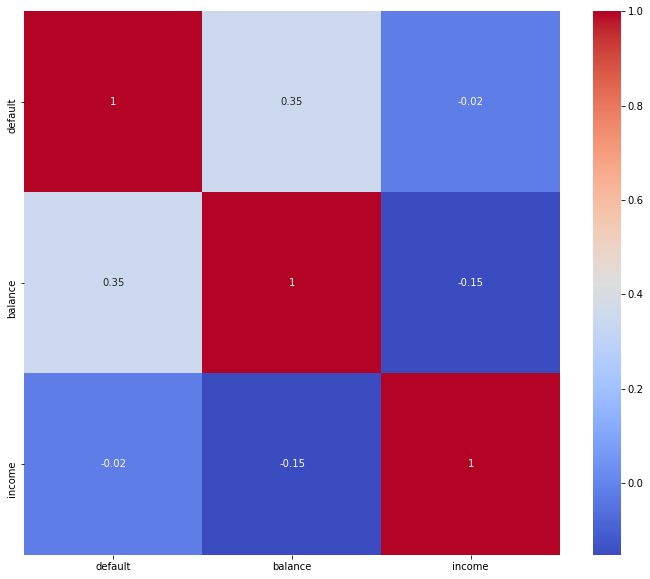

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [20]:
y=data['default']
X=data.drop(['default'],axis=1)

In [21]:
#from sklearn.preprocessing import StandardScaler
#std=StandardScaler()
#X[['balance','income']]=std.fit_transform(X[['balance','income']])

In [22]:
X.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374100,33516.984400
std,483.713932,13336.637929
min,0.000000,772.000000
25%,482.000000,21340.750000
50%,824.000000,34552.500000
75%,1166.250000,43807.500000
max,2654.000000,73554.000000


In [23]:
cat_feat=np.where(X.dtypes==np.object)[0]

In [24]:
#import sklearn.model_selection
#help(sklearn.model_selection)
#from sklearn.model_selection import StratifiedShuffleSplit
#sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=7)
#sss.get_n_splits(X, y)   
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=7127,stratify=y)

In [25]:
# X.loc[train_index]

In [26]:
#for train_index, test_index in sss.split(X, y):
    # print("TRAIN:", train_index, "TEST:", test_index)
    #X_train, X_test = X.loc[train_index], X.loc[test_index]
    #y_train, y_test = y.loc[train_index], y.loc[test_index]

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,roc_auc_score,f1_score,recall_score

In [28]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(learning_rate=0.01,max_depth=6,iterations=1000,random_seed=5571, eval_metric='Accuracy',use_best_model=True,cat_features=cat_feat)
eval_set=[(X_test,y_test)]

cat.fit(X_train,y_train,early_stopping_rounds=300, eval_set=eval_set,verbose=100)
pred = cat.predict(X_test)
print('Accuracy is : ', accuracy_score(y_test,pred))
print('Precision is : ', precision_score(y_test,pred))

0:	learn: 0.9667500	test: 0.9665000	best: 0.9665000 (0)	total: 343ms	remaining: 5m 42s
100:	learn: 0.9738750	test: 0.9715000	best: 0.9720000 (26)	total: 4.7s	remaining: 41.8s
200:	learn: 0.9737500	test: 0.9720000	best: 0.9720000 (26)	total: 8.81s	remaining: 35s
300:	learn: 0.9740000	test: 0.9725000	best: 0.9725000 (252)	total: 12.8s	remaining: 29.6s
400:	learn: 0.9736250	test: 0.9725000	best: 0.9725000 (252)	total: 17.3s	remaining: 25.9s
500:	learn: 0.9737500	test: 0.9725000	best: 0.9725000 (252)	total: 21.5s	remaining: 21.4s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 0.9725
bestIteration = 252

Shrink model to first 253 iterations.
Accuracy is :  0.9725
Precision is :  0.7


In [29]:
import joblib

with open('loan.joblib', 'wb') as f:
    joblib.dump(cat, f)

In [45]:
pre_df = pd.DataFrame({'Predicted':pred,'Actual':y_test})
pre_df.head()

,Predicted,Actual
398,0.0,0
2368,0.0,0
3971,0.0,0
8552,0.0,0
2497,0.0,0


In [52]:
a = pre_df[(pre_df.Predicted==0.0) & (pre_df.Actual==0)].head(3).index.tolist()
b = pre_df[(pre_df.Predicted==1.0) & (pre_df.Actual==1)].head(3).index.tolist()

In [43]:
dataset['income'] = np.round(dataset['income'])
dataset['balance'] = np.round(dataset['balance'])

In [53]:
b

[4709, 2800, 3913]

In [54]:
c = dataset.loc[a]
d = dataset.loc[b]

e = pd.concat([c,d])

In [55]:
e

,default,student,balance,income
398,No,No,226.0,32019.0
2368,No,No,943.0,30179.0
3971,No,No,1139.0,42759.0
4709,Yes,No,2075.0,40882.0
2800,Yes,Yes,2036.0,14436.0
3913,Yes,Yes,2334.0,19336.0


In [56]:
e.to_csv('sample.csv',index=False)

In [28]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
precision=precision_score(y_test,pred)
roc_auc_score=roc_auc_score(y_test,pred)
f1=f1_score(y_test,pred)
recall=recall_score(y_test,pred)
print('precision: ',precision)
print('roc_auc_score: ',roc_auc_score)
print(('f1 score: ',f1))
print(('recall score: ',recall))

precision:  0.8
roc_auc_score:  0.647960404908
('f1 score: ', 0.43478260869565216)
('recall score: ', 0.29850746268656714)


In [29]:
confusion_matrix(y_test,pred,labels=[0,1])

array([[1928,    5],
       [  47,   20]])

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(learning_rate=0.01,n_estimators=200)
gb.fit(X_train,y_train)
pre=gb.predict(X_test)
precision=precision_score(y_test,pre)
precision

0.70370370370370372

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
pr=rf.predict(X_test)
precision=precision_score(y_test,pr)
precision

0.55263157894736847

precision scores after preprocessing(default parameters):
Logistic Regression-0.8
Gradient Boosting- 0.47
Random Forest - 0.52

In [32]:
from sklearn.svm import SVC
svc=SVC(C=10)
svc.fit(X_train,y_train)
p=svc.predict(X_test)
precision=precision_score(y_test,p)
precision

0.77777777777777779

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,accuracy_score,precision_recall_curve

In [34]:
param_grid={'penalty':['l1','l2'],
           'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           'max_iter':[100,120,150,170,190]
           }
scoring={'accuracy_score': make_scorer(accuracy_score),
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score)
        }


In [35]:
grid=GridSearchCV(lr,param_grid,scoring='precision',cv=10,n_jobs=4,refit='precision_score')

In [36]:
#X_train=pd.DataFrame(X_train)
#y_train=pd.DataFrame(y_train)
#X_train

In [37]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'max_iter': [100, 120, 150, 170, 190]},
       pre_dispatch='2*n_jobs', refit='precision_score',
       return_train_score=True, scoring='precision', verbose=0)

In [38]:
grid.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}

In [39]:
grid.best_score_

0.7823689574314574